22


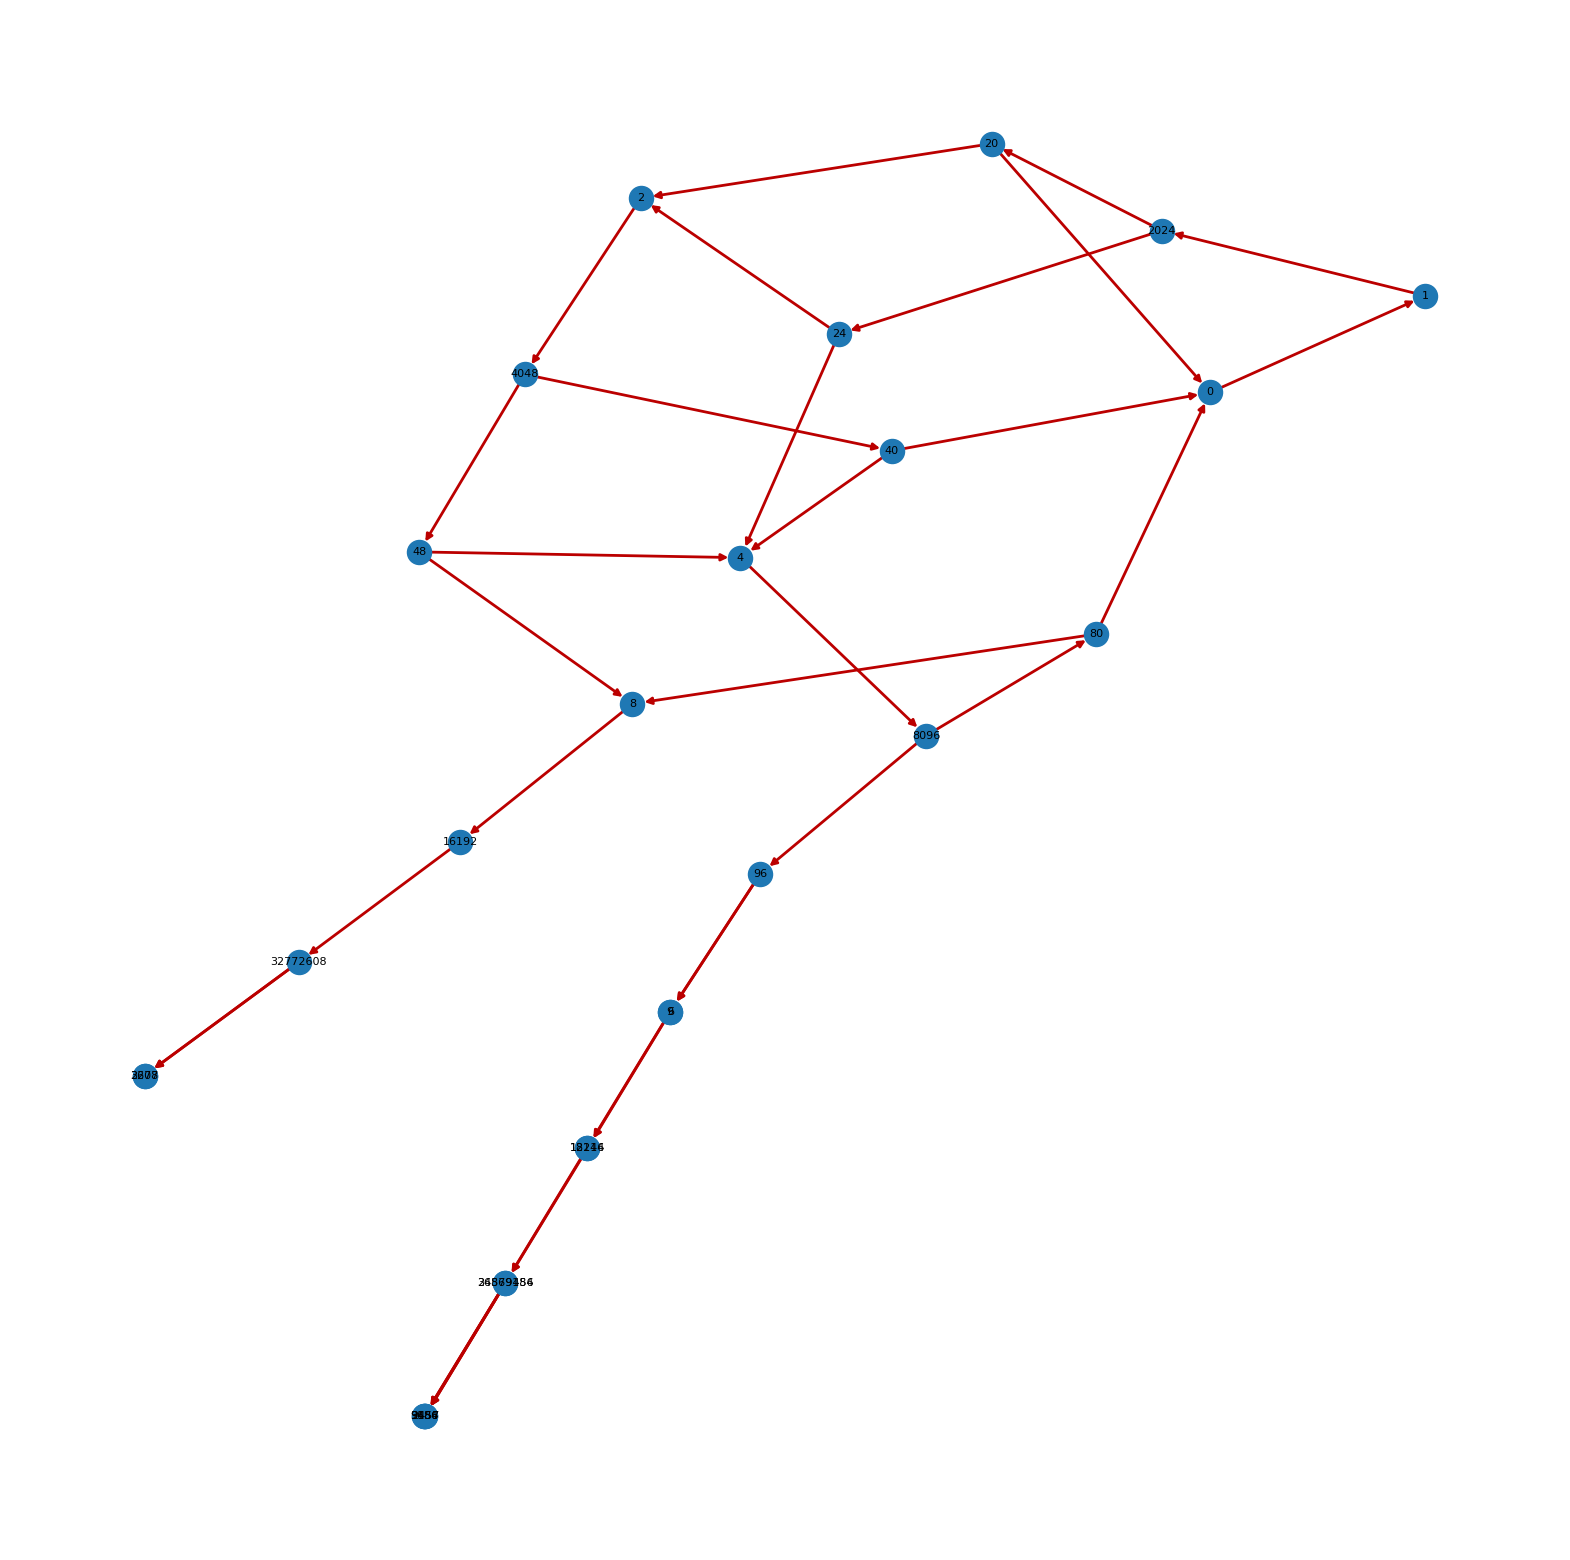

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np


class Node():
    def __init__(self, n: int):
        self.n = n
        self.children = []

    def blink(self, n: int) -> list[int]:
        if n == 0:
            return [1]
        elif int(np.log10(n)) % 2 != 0:
            no_digits = int(np.log10(n))+1
            left = n // 10 ** (no_digits / 2)
            right = n % 10 ** (no_digits / 2)
            return [int(left), int(right)]
        else:
            return [n * 2024]

    def __str__(self):
        return f"""{self.n} -> {self.children}"""

    def __repr__(self):
        return self.__str__()


class Tree():
    def __init__(self, init: list[int]):
        self.root = [Node(x) for x in init]
        # memoization guide for
        self.memory: dict[int, list[Node]] = {}
        self.ping_depth = 0
        self.leaf_nodes = self.root

    def ping(self):
        new_leaf_nodes = []
        for ln in self.leaf_nodes:
            if ln.n not in self.memory:
                ln.children = [Node(x) for x in ln.blink(ln.n)]
                self.memory[ln.n] = ln.children
            else:
                ln.children = self.memory[ln.n]

            new_leaf_nodes += ln.children
        self.ping_depth += 1
        self.leaf_nodes = new_leaf_nodes

    def add_nodes(self, G: nx.DiGraph):
        for i, node in enumerate(self.memory):
            G.add_node(node)
            for child in self.memory[node]:
                G.add_edge(node, child.n, length=i)

    def graph(self):
        G = nx.DiGraph()
        tree.add_nodes(G)
        pos = nx.kamada_kawai_layout(G)
        plt.figure(figsize=(20, 20))
        nx.draw_networkx_nodes(G, pos, node_size=100, node_shape='s')
        nx.draw_networkx_labels(G, pos, font_size=8)
        nx.draw(G, pos, edge_color='#BB0000', width=2, edge_cmap=plt.cm.Blues)
        plt.savefig("graph.png", dpi=400)

    def __str__(self):
        return str(self.root)


tree = Tree([0])

for i in range(12):
    tree.ping()

print(len(tree.memory.values()))

tree.graph()